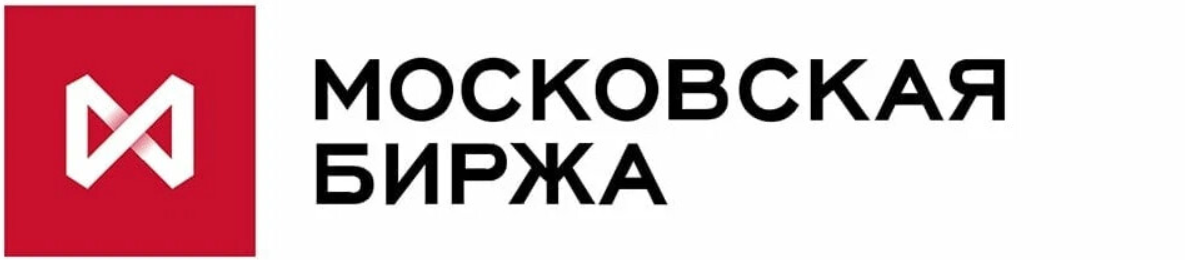

## Цель проекта:
Предсказать стоимость акций Индекса Московской биржи (IMOEX).

## Немного о данных:  

Данные были взяты с сайта [Московская Биржа | Индексы](https://www.moex.com/ru/index/IMOEX/archive/). В открытом доступе данные доступны за период, равному последним **_10 лет_**.

# Задание 1

**<u>Выбрать и обосновать метрику для измерения качества.</u>**

В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения).

_**Критерии оценки**_:

- Предложена метрика - _5б_.

- Присутствует корректное обоснование - _5б_.

[Дополнительный материал о метриках](https://habr.com/ru/company/jetinfosystems/blog/420261/)

Для возможных моделей текущего исследования предлагаю выделить следующие _**ключевые**_ метрики:  
1. **RMSE** - метрика, которая позволяет оценить, насколько точно модель предсказывает целевую переменную. (между MSE и RMSE отдаю предпочтение второй, потому что отслеживание значений в тех же единцах, что и единицы измерения целевой переменной датасета, видится _удобным_). Метрика измеряет среднеквадратичную ошибку между фактическими и предсказанными значениями;
2. **MAPE** - метрика, позволяющая оценить, насколько близко предсказанные значения к фактическим значениям. Чем меньше, тем лучше модель. Метрика позволяет оценить процентную точность модели, измеряя среднюю абсолютную процентную ошибку между фактическими и предсказанными значениями;
3. **R^2** - статистическая мера того, насколько хорошо предсказания регрессии приближаются к реальным точкам данных. Чем больше значение, тем большее соответствие с данными.



Таким образом, метрика _RMSE_ важна для минимизации ошибки предсказания и получения точных числовых значений, метрика _MAPE_ полезна при оценке точности предсказаний в процентном соотношении, метрика _R^2_ имеет значение при оценке объяснительной способности модели.  
<br>
Однако, на мой взгляд, первостепенной метрикой всё же является <u>**R^2**</u>, поскольку ключевая задача модели в результате ее обучения - делать предсказания, максимально приближенные к _реальным_.

# Задание 2

**<u>Провести [EDA](https://moodle.itmo.ru/mod/resource/view.php?id=4771) на своих данных. </u>**

В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

_**Критерии оценки**_:

- Рассмотрены базовые характеристики/статистики для набора данных - _2б_.

- Реализованы наиболее релевантные визуализации - _4б_.

- По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп). - _4б_.

In [1]:
!pip install --upgrade matplotlib > None

In [2]:
!pip install basemap > None

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
path = '/content/IMOEX.csv'
data = pd.read_csv(path, encoding='cp1251', delimiter=';')
data.head()

,BOARDID,SECID,TRADEDATE,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME
0,SNDX,IMOEX,06.01.2014,Индекс МосБиржи,Индекс МосБиржи,"1466,15","1504,14","1504,33","1464,97",16900288729,NaN,NaN,2,"6,62517E+12",RUB,4518760150,3,NaN
1,SNDX,IMOEX,08.01.2014,Индекс МосБиржи,Индекс МосБиржи,"1462,67","1465,99","1470,25","1460,41",16027383642,NaN,NaN,2,"6,60945E+12",RUB,4518760150,3,NaN
2,SNDX,IMOEX,09.01.2014,Индекс МосБиржи,Индекс МосБиржи,"1465,14","1462,67","1470,65","1460,81",20056121954,NaN,NaN,2,"6,62061E+12",RUB,4518760150,3,NaN
3,SNDX,IMOEX,10.01.2014,Индекс МосБиржи,Индекс МосБиржи,"1469,19","1465,74","1470,73","1454,75",29274890126,NaN,NaN,2,"6,63894E+12",RUB,4518760150,3,NaN
4,SNDX,IMOEX,13.01.2014,Индекс МосБиржи,Индекс МосБиржи,"1477,56","1469,19","1482,45","1466,51",29596729994,NaN,NaN,2,"6,67675E+12",RUB,4518760150,3,NaN


In [5]:
data.tail()

,BOARDID,SECID,TRADEDATE,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME
2527,SNDX,IMOEX,05.02.2024,Индекс МосБиржи,Индекс МосБиржи,"3226,79","3218,91","3232,38","3218,91",79772720557,0.0,0.0,2,"5,71481E+12",RUB,1771049604,3,NaN
2528,SNDX,IMOEX,06.02.2024,Индекс МосБиржи,Индекс МосБиржи,"3238,4","3234,44","3238,4","3228,78",47381481665,0.0,0.0,2,"5,73536E+12",RUB,1771049604,3,NaN
2529,SNDX,IMOEX,07.02.2024,Индекс МосБиржи,Индекс МосБиржи,"3256,58","3240,57","3259,24","3240,16",71996364667,0.0,0.0,2,"5,76757E+12",RUB,1771049604,3,NaN
2530,SNDX,IMOEX,08.02.2024,Индекс МосБиржи,Индекс МосБиржи,"3241,81","3261,18","3266,45","3236,79",93017428633,0.0,0.0,2,"5,7414E+12",RUB,1771049604,3,NaN
2531,SNDX,IMOEX,09.02.2024,Индекс МосБиржи,Индекс МосБиржи,"3242,38","3231,3","3242,38","3219,56",49774764900,0.0,0.0,2,"5,74242E+12",RUB,1771049604,3,NaN


In [6]:
data.columns

Index(['BOARDID', 'SECID', 'TRADEDATE', 'SHORTNAME', 'NAME', 'CLOSE', 'OPEN',
       'HIGH', 'LOW', 'VALUE', 'DURATION', 'YIELD', 'DECIMALS',
       'CAPITALIZATION', 'CURRENCYID', 'DIVISOR', 'TRADINGSESSION', 'VOLUME'],
      dtype='object')

In [7]:
data.shape

(2532, 18)

In [8]:
data.dtypes

BOARDID            object
SECID              object
TRADEDATE          object
SHORTNAME          object
NAME               object
CLOSE              object
OPEN               object
HIGH               object
LOW                object
VALUE              object
DURATION          float64
YIELD             float64
DECIMALS            int64
CAPITALIZATION     object
CURRENCYID         object
DIVISOR             int64
TRADINGSESSION      int64
VOLUME            float64
dtype: object

## Предобработка данных

Сделаем обработку данных нашего датасета.  
</br>
Начнем с обозначения чисел: поменяем запятую в них на точку.  
Затем все столбцы с числами, имеющие числовое представление, переформатируем в _числовой_ формат.  
Для даты - сделаем формат _датированным_.   


In [9]:
data = data.replace(',', '.', regex=True)

numeric_columns = ['CLOSE', 'OPEN', 'HIGH', 'LOW', 'VALUE', 'CAPITALIZATION']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)
data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'], format='%d.%m.%Y')

data.head()

,BOARDID,SECID,TRADEDATE,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME
0,SNDX,IMOEX,2014-01-06,Индекс МосБиржи,Индекс МосБиржи,1466.15,1504.14,1504.33,1464.97,1.690029e+10,NaN,NaN,2,6.625170e+12,RUB,4518760150,3,NaN
1,SNDX,IMOEX,2014-01-08,Индекс МосБиржи,Индекс МосБиржи,1462.67,1465.99,1470.25,1460.41,1.602738e+10,NaN,NaN,2,6.609450e+12,RUB,4518760150,3,NaN
2,SNDX,IMOEX,2014-01-09,Индекс МосБиржи,Индекс МосБиржи,1465.14,1462.67,1470.65,1460.81,2.005612e+10,NaN,NaN,2,6.620610e+12,RUB,4518760150,3,NaN
3,SNDX,IMOEX,2014-01-10,Индекс МосБиржи,Индекс МосБиржи,1469.19,1465.74,1470.73,1454.75,2.927489e+10,NaN,NaN,2,6.638940e+12,RUB,4518760150,3,NaN
4,SNDX,IMOEX,2014-01-13,Индекс МосБиржи,Индекс МосБиржи,1477.56,1469.19,1482.45,1466.51,2.959673e+10,NaN,NaN,2,6.676750e+12,RUB,4518760150,3,NaN


А теперь удалим признаки, которые нам **_точно_** не нужны:  
BOARDID, SECID, CURRENCYID, SHORTNAME, NAME, CURRENCYID	- они постоянные, мы рассматриваем только одну котировку акций:

In [10]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Уникальные значения в столбце {column}:")
    print(unique_values)
    print(f"Количество уникальных значений: {len(unique_values)}")
    print()

    if len(unique_values) == 1:
        data = data.drop(column, axis=1)

data.head()

Уникальные значения в столбце BOARDID:
['SNDX']
Количество уникальных значений: 1

Уникальные значения в столбце SECID:
['IMOEX']
Количество уникальных значений: 1

Уникальные значения в столбце TRADEDATE:
['2014-01-06T00:00:00.000000000' '2014-01-08T00:00:00.000000000'
 '2014-01-09T00:00:00.000000000' ... '2024-02-07T00:00:00.000000000'
 '2024-02-08T00:00:00.000000000' '2024-02-09T00:00:00.000000000']
Количество уникальных значений: 2532

Уникальные значения в столбце SHORTNAME:
['Индекс МосБиржи']
Количество уникальных значений: 1

Уникальные значения в столбце NAME:
['Индекс МосБиржи']
Количество уникальных значений: 1

Уникальные значения в столбце CLOSE:
[1466.15 1462.67 1465.14 ... 3256.58 3241.81 3242.38]
Количество уникальных значений: 2506

Уникальные значения в столбце OPEN:
[1504.14 1465.99 1462.67 ... 3240.57 3261.18 3231.3 ]
Количество уникальных значений: 2516

Уникальные значения в столбце HIGH:
[1504.33 1470.25 1470.65 ... 3259.24 3266.45 3242.38]
Количество уникальных 

,TRADEDATE,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,CAPITALIZATION,DIVISOR
0,2014-01-06,1466.15,1504.14,1504.33,1464.97,1.690029e+10,NaN,NaN,6.625170e+12,4518760150
1,2014-01-08,1462.67,1465.99,1470.25,1460.41,1.602738e+10,NaN,NaN,6.609450e+12,4518760150
2,2014-01-09,1465.14,1462.67,1470.65,1460.81,2.005612e+10,NaN,NaN,6.620610e+12,4518760150
3,2014-01-10,1469.19,1465.74,1470.73,1454.75,2.927489e+10,NaN,NaN,6.638940e+12,4518760150
4,2014-01-13,1477.56,1469.19,1482.45,1466.51,2.959673e+10,NaN,NaN,6.676750e+12,4518760150


Касаемо этих двух признаков:  
```
Уникальные значения в столбце DURATION:
[nan  0.]
Количество уникальных значений: 2

Уникальные значения в столбце YIELD:
[nan  0.]
Количество уникальных значений: 2
```
-- стоит сказать, что ранее они не использовались для IMOEX, в какой-то момент NaN заменили на 0 - никакой информации данные столбцы не несут - удаляем "руками":

In [11]:
data = data.drop(['DURATION', 'YIELD'], axis=1)
data.head()

,TRADEDATE,CLOSE,OPEN,HIGH,LOW,VALUE,CAPITALIZATION,DIVISOR
0,2014-01-06,1466.15,1504.14,1504.33,1464.97,1.690029e+10,6.625170e+12,4518760150
1,2014-01-08,1462.67,1465.99,1470.25,1460.41,1.602738e+10,6.609450e+12,4518760150
2,2014-01-09,1465.14,1462.67,1470.65,1460.81,2.005612e+10,6.620610e+12,4518760150
3,2014-01-10,1469.19,1465.74,1470.73,1454.75,2.927489e+10,6.638940e+12,4518760150
4,2014-01-13,1477.56,1469.19,1482.45,1466.51,2.959673e+10,6.676750e+12,4518760150


Остался еще один признак, который _сомнителен_ по количеству уникальных значений:
```
Уникальные значения в столбце DIVISOR:
[4518760150 4512891870 4508662236 4762945826 4635503383 4697296971
 4685888322 4663700559 4632583222 4689729104 4697009728 4600427694
 4727010744 4687074197 4782605958 4634679117 4596659342 4408925727
 4311697557 4315233488 4277866281 4262826228 4141587958 3949018641
 3708780020 3927791500 3871514068 4042851180 4257839329 4809707787
 5079230866 5077336065 5105497524 5023191120 4944847155 4781494292
 4777848516 4930146741 4872878800 3416313660 1691971867 1745961296
 1771049604]
Количество уникальных значений: 43
```
Его, вместе с признаками VALUE и CAPITALIZATION,	пока оставим для рассмотрения.

И проверим, есть ли у нас пропущенные значения:

In [12]:
data.isna().sum()

TRADEDATE         0
CLOSE             0
OPEN              0
HIGH              0
LOW               0
VALUE             0
CAPITALIZATION    0
DIVISOR           0
dtype: int64

И какой тип данных сейчас у оставшихся признаков:

In [13]:
data.dtypes

TRADEDATE         datetime64[ns]
CLOSE                    float64
OPEN                     float64
HIGH                     float64
LOW                      float64
VALUE                    float64
CAPITALIZATION           float64
DIVISOR                    int64
dtype: object

Следующий важный шаг - выделение целевой переменной. Это будет **_цена закрытия_**.  
Выделим ее:

In [14]:
data_target = data['CLOSE']

## Анализ признаков

Построим матрицу корреляции для наших признаков:

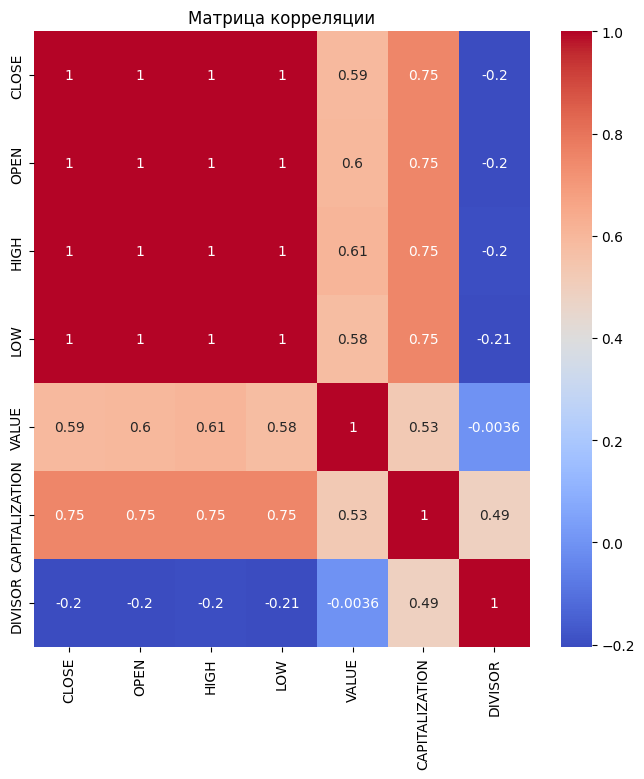

In [15]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Видим сильную корреляцию основных признаков 'CLOSE', 'OPEN', 'HIGH', 'LOW' - нужно с этим что-то делать.

Добавим **новые** признаки:  
<br>
Первый - разница между ценой открытия и ценой закрытия - _OPEN_CLOSE_DIFF_  
Второй - разница между максимальной и минимальной ценой акций за торговый день - _'PRICE_RANGE'_

In [16]:
data_new = data.copy()

In [17]:
data_new['OPEN_CLOSE_DIFF'] = data['OPEN'] - data['CLOSE']
data_new['PRICE_RANGE'] = data['HIGH'] - data['LOW']

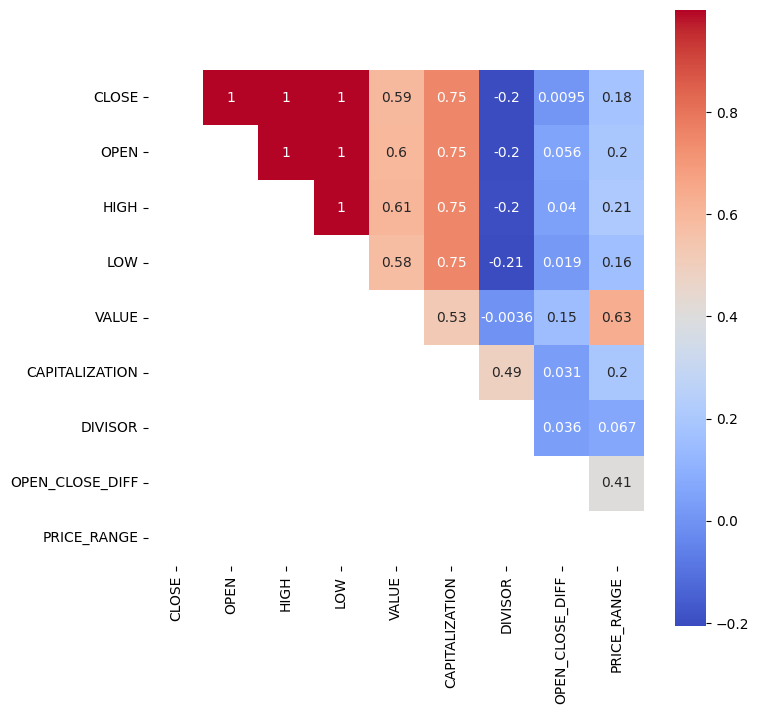

In [18]:
corrs = data_new.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
upper_tri

plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap='coolwarm', square=True, annot=True);

Пока что для рассмотрения уберем только те признаки, что имеют _достоверную_ корреляцию:

In [19]:
cols_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

data_new = data_new.drop(cols_to_drop, axis=1)

data_new.columns

Index(['TRADEDATE', 'CLOSE', 'VALUE', 'CAPITALIZATION', 'DIVISOR',
       'OPEN_CLOSE_DIFF', 'PRICE_RANGE'],
      dtype='object')

Теперь тогда встает вопрос - на каких все же признаках стоит обучать модель?

И посмотрим на еще один вариант визуализации признаков:

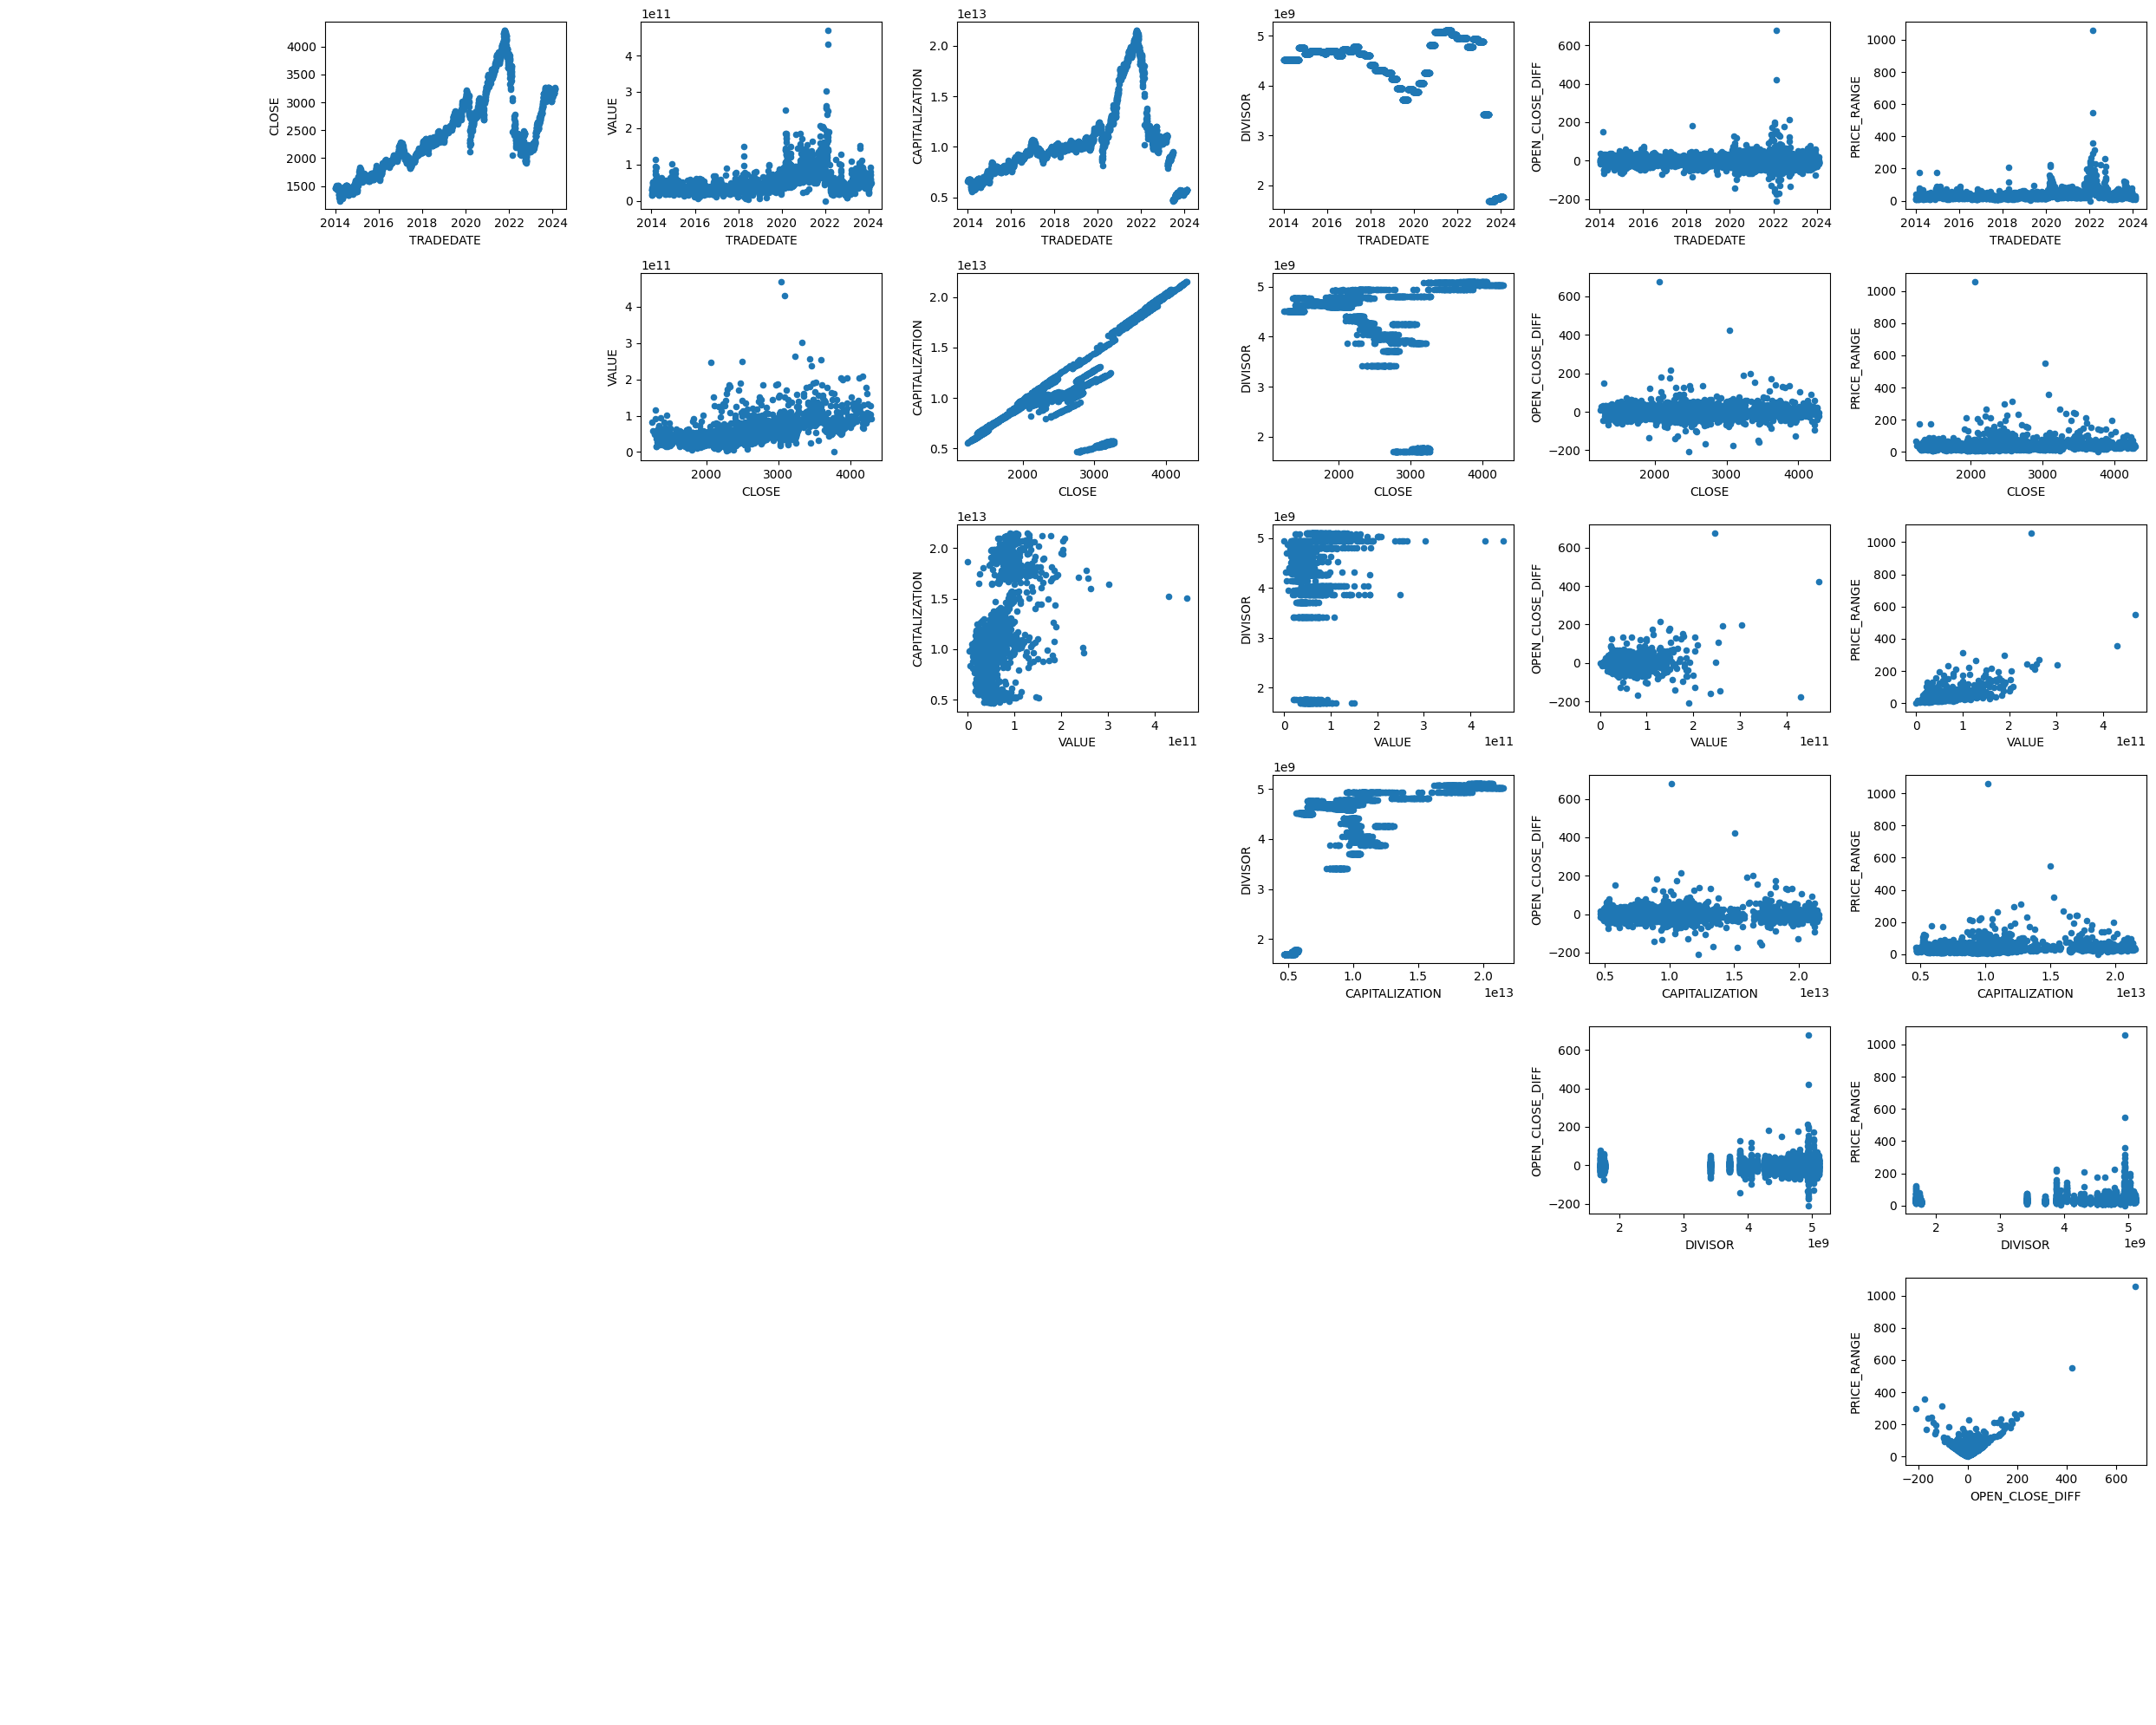

In [20]:
fig, axes = plt.subplots(nrows=len(data_new.columns), ncols=len(data_new.columns), figsize=(25, 20))

for i, feature_1 in enumerate(data_new.columns):
    for j, feature_2 in enumerate(data_new.columns):
        if i >= j:
            axes[i, j].axis('off')
        else:
            data_new.plot.scatter(x=feature_1, y=feature_2, ax=axes[i, j])

plt.tight_layout()
plt.show()

И зафиналим просмотром на возможные выбросы в данных:

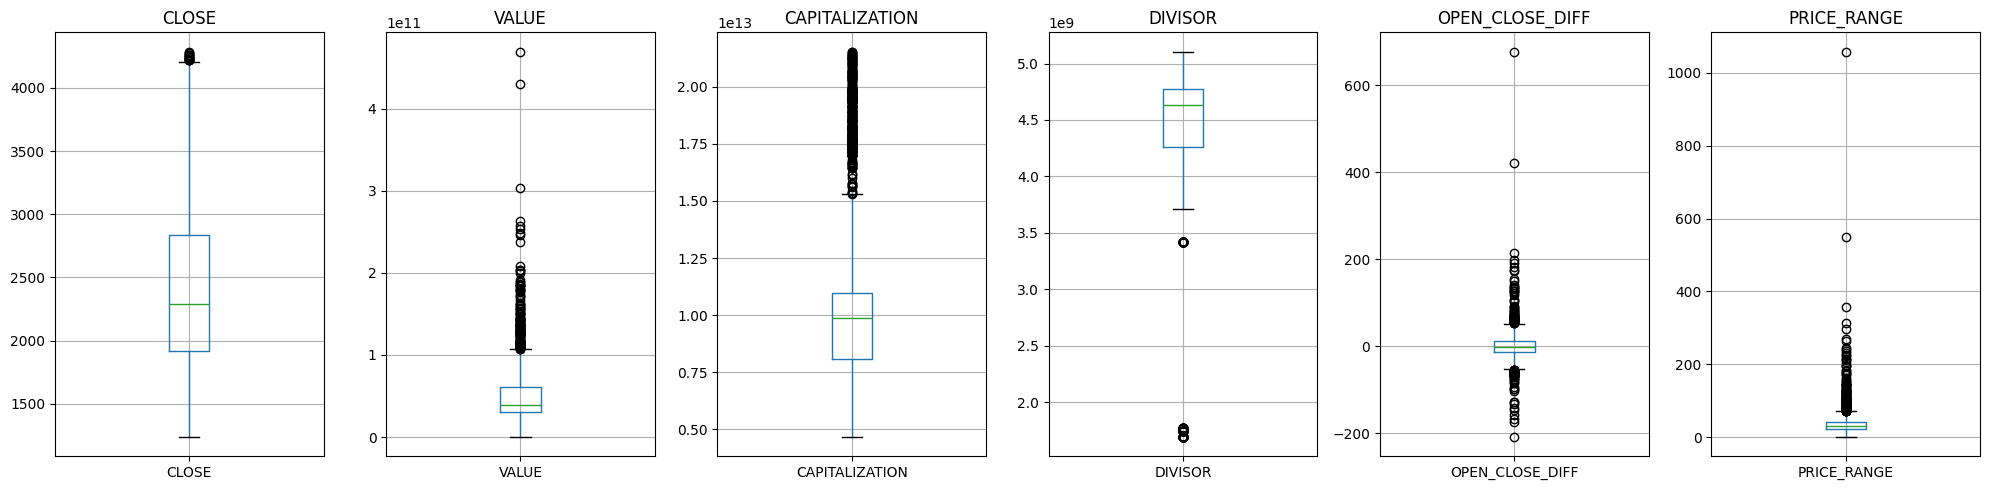

In [21]:
numeric_columns = data_new.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 5))

for i, feature in enumerate(numeric_columns):
    data_new.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

В принципе, как мне кажется, ничего удивительного для цен акций.
Выбросы для них характеры.  А некоторые параметры априори являются специфическими.
<br>
_Пока что их более детальное рассмотрение будет **опущено**._

Теперь посмотрим на распределение численных признаков:

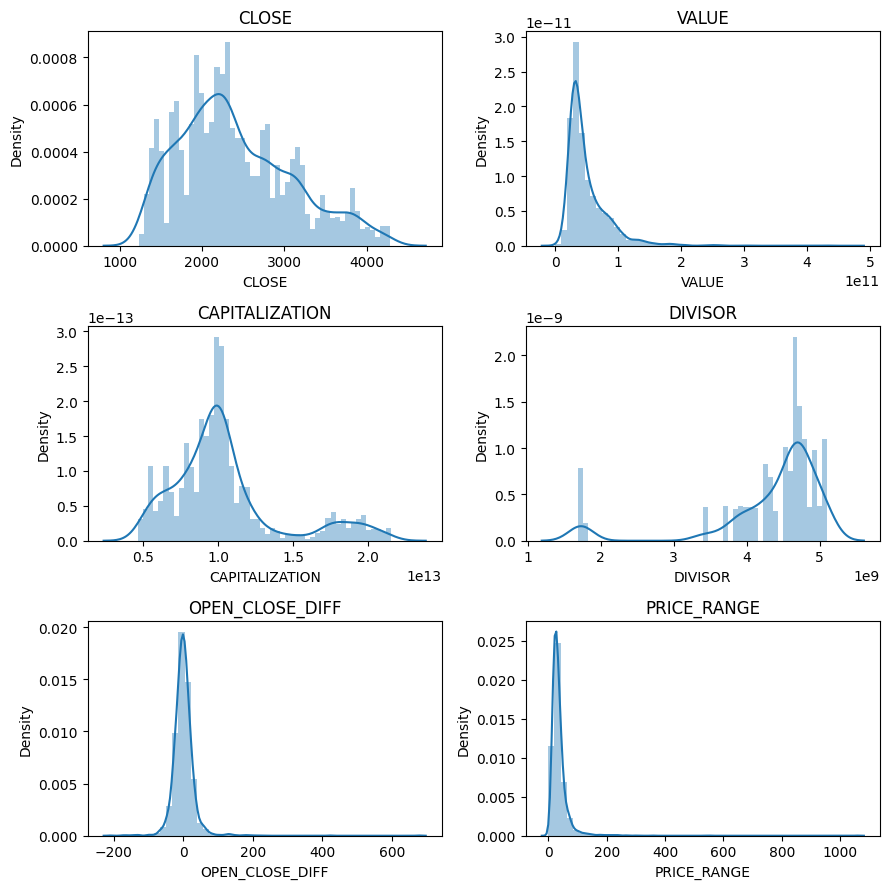

In [22]:
fig, axes = plt.subplots(len(numeric_columns)//2, 2, figsize=(9, 3 * (len(numeric_columns)//2)))

for i, feature in enumerate(data_new.columns[1:]):
    if data_new[feature].dtype in [int, float]:
        row = i // 2
        col = i % 2
        sns.distplot(data_new[feature].dropna(), bins=50, ax=axes[row, col])
        axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

Параметр _DIVISOR_ отличается от нормального распределния - как будто можно делитнуть, без попыток его нормализовать.  
<br>

**ОДНАКО пока просто БУДЕМ ЭТО ИМЕТЬ В ВИДУ**

Напоминают ли текущие распределения нормальное?  
-- Напоминают :)  

За исключением целевого - _CLOSE_. Но, как будто, это не столь важно для него.

## Итоговое представление данных

В терминах фондовой биржи обычно говорят про _линию тренда_ и _волатильность_.

Представим данные цен котировок IMOEX на момент открытия и закрытия торговой сессии в привычном классческом виде и определим линии тренда:

In [23]:
new_data_tr = data['TRADEDATE'].copy()
new_data_tr = data['TRADEDATE'].apply(lambda x: x.toordinal())

trend_open = np.polyfit(new_data_tr, data['OPEN'], 1)
trend_open_line = np.polyval(trend_open, new_data_tr)

trend_close = np.polyfit(new_data_tr, data['CLOSE'], 1)
trend_close_line = np.polyval(trend_close, new_data_tr)

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['TRADEDATE'], y=data['OPEN'], mode='lines', name='OPEN'))
fig.add_trace(go.Scatter(x=data['TRADEDATE'], y=data['CLOSE'], mode='lines', name='CLOSE'))

fig.add_trace(go.Scatter(x=data['TRADEDATE'], y=trend_close_line, mode='lines', name='Trend CLOSE'))
fig.add_trace(go.Scatter(x=data['TRADEDATE'], y=trend_open_line, mode='lines', name='Trend OPEN'))

fig.update_layout(title='График ценообразования на момент открытия и закрытия торговой сессии акций IMOEX. Линии тренда',
                  xaxis_title='Дата', yaxis_title='Цена')

fig.show()

In [24]:
fig.write_html("classic_IMOEX.html")

Как видим, главный тренд у акций - _восходящий_.

Построим график волатильности акций в течение периода, равному _260 дням_ (одному году, т.к. в данных отсутвуют сб и вс - выходные):

In [25]:
fig = go.Figure()

data_open_vol = data['OPEN'].rolling(window=260).std()
data_close_vol = data['CLOSE'].rolling(window=260).std()

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['TRADEDATE'], y=data_open_vol, mode='lines', name='Open Volatility'))
fig.add_trace(go.Scatter(x=data['TRADEDATE'], y=data_close_vol, mode='lines', name='Close Volatility'))

fig.update_layout(title='График годовой волатильности акций IMOEX', xaxis_title='Дата', yaxis_title='Волатильность')

fig.show()

In [26]:
fig.write_html("volatility_IMOEX.html")

Из-за не самой спокойной политическо-экономической ситуации можно сделать вывод, что рынок российских акций весьма неустойчив - об этом свидельствует и график волатильности IMOEX.

В качестве более интерактивного представления данных:

Построим график свечей:

In [27]:
fig = go.Figure(data=[go.Candlestick(x=data['TRADEDATE'],
        open=data["OPEN"],
        high=data["HIGH"],
        low=data["LOW"],
        close=data["CLOSE"])])

fig.update_layout(
    title='Свечной график стоимости акций IMOEX',
    yaxis_title='Цена', xaxis_title='Дата', xaxis_rangeslider_visible=False

)

fig.show()

In [28]:
fig.write_html("candle_IMOEX.html")

🟢 _Зеленые_ свечи указывают на то, что цена закрытия выше или равна цене открытия.  
🔴 _Красные_ свечи указывают на то, что цена закрытия ниже цены открытия.

Добавим "интерактива" - ползунок к графику выше:

In [29]:
fig = go.Figure(
    data=go.Ohlc(
        x=data['TRADEDATE'],
        open=data["OPEN"],
        high=data["HIGH"],
        low=data["LOW"],
        close=data["CLOSE"]
    )
)

fig.update_layout(
    title='График стоимости акций IMOEX',
    yaxis_title='Цена', xaxis_title='Дата'

)
fig.show()

In [30]:
fig.write_html("slider_IMOEX.html")

Возможно, стоит произвести обработку пропусков в признаке "даты" - выходных, заполнив данные значениями пятницы на момент закрытия торгов. 🤔

# Задание 3

**<u>Построить и оценить качество бейзлайна.</u>**

В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.

_**Критерии оценки:**_

- Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - _3б_.

- Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - _5б_.

- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - _2б_.

_P.S. Предполагается, что участники  продвинутого трека среди прочего продемонстрируют использование библиотеки plotly для визуализации._

## Обучение бейзлайн-модели

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

In [32]:
test_size = 0.2
random_state = 2024

In [33]:
data_new.columns

Index(['TRADEDATE', 'CLOSE', 'VALUE', 'CAPITALIZATION', 'DIVISOR',
       'OPEN_CLOSE_DIFF', 'PRICE_RANGE'],
      dtype='object')

Обычно при прогнозировании цен акций, используется информация о ценах акций в прошлом (открытие, максимум, минимум) для предсказания будущих цен закрытия.

In [34]:
label_encoder = LabelEncoder()

data_new['TRADEDATE'] = label_encoder.fit_transform(data_new['TRADEDATE'])

train_size = int(len(data_new) * 0.8)
train_data = data_new[:train_size]
test_data = data_new[train_size:]

X_train =  train_data.drop('CLOSE', axis=1)
X_test = test_data.drop('CLOSE', axis=1)
y_train = train_data['CLOSE']
y_test = test_data['CLOSE']
X_train.head()

,TRADEDATE,VALUE,CAPITALIZATION,DIVISOR,OPEN_CLOSE_DIFF,PRICE_RANGE
0,0,1.690029e+10,6.625170e+12,4518760150,37.99,39.36
1,1,1.602738e+10,6.609450e+12,4518760150,3.32,9.84
2,2,2.005612e+10,6.620610e+12,4518760150,-2.47,9.84
3,3,2.927489e+10,6.638940e+12,4518760150,-3.45,15.98
4,4,2.959673e+10,6.676750e+12,4518760150,-8.37,15.94


Рассмотрим три варианта прогноза с разными стратегиями: выбор медианы, среднего, квантиль:

In [35]:
strategies = ['median', 'mean', 'quantile']
metrics = ['RMSE', 'MAPE', 'R^2']

for strategy in strategies:
    dummy = DummyRegressor(strategy=strategy)

    if strategy == 'quantile':
        dummy.quantile = 0.5

    dummy.fit(X_train, y_train)
    y_preds_dummy = dummy.predict(X_test)

    rmse_dummy = np.sqrt(mean_squared_error(y_test, y_preds_dummy))
    mape_dummy = mean_absolute_percentage_error(y_test, y_preds_dummy)
    r2_dummy = r2_score(y_test, y_preds_dummy)

    print(f"Strategy: {strategy}")
    print(f"RMSE константного предсказания: {rmse_dummy}")
    print(f"MAPE константного предсказания: {mape_dummy}")
    print(f"R^2 константного предсказания: {r2_dummy}")
    print()

Strategy: median
RMSE константного предсказания: 608.2331747895666
MAPE константного предсказания: 0.15347273418835855
R^2 константного предсказания: -0.8048783515868434

Strategy: mean
RMSE константного предсказания: 535.0803928179208
MAPE константного предсказания: 0.14373830249306493
R^2 константного предсказания: -0.39683723088356615

Strategy: quantile
RMSE константного предсказания: 608.2331747895666
MAPE константного предсказания: 0.15347273418835855
R^2 константного предсказания: -0.8048783515868434



Как видим, разница значений метрик у бейзлайновой модели в зависимости от выбранной _стратегии_ незначительная.  
<br>
Качество модели оставляет желать лучшего.  
Параметры _RMSE_, _R^2_ заставляют "содрогаться" от значений, хотя и значение _MAPE_ для цен акций - немало.

### Визуализация результатов

Построим график для _одной_ из стратегий (т.к. они похожи друг на друга).

In [36]:
dummy_med = DummyRegressor(strategy='median')
dummy_med.fit(X_train, y_train)
y_preds_dummy_med = dummy_med.predict(X_test)

In [37]:
def plot_model_results(actual, predicted, title):
    results = pd.DataFrame({'True': actual, 'Prediction': predicted})
    sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
    d_line= np.arange(results.min().min(), results.max().max())
    plt.plot(d_line, d_line, color='red', linestyle='--')
    plt.title = title
    plt.grid()
    plt.show()

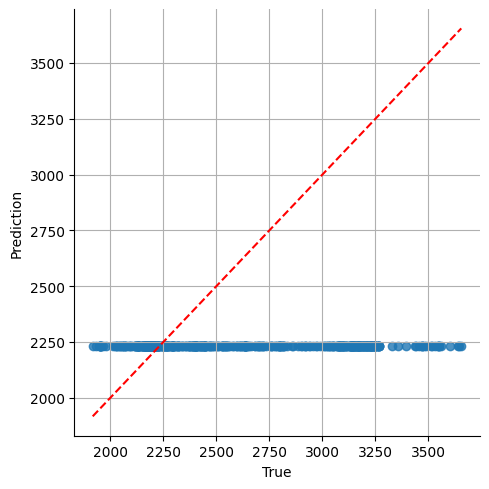

In [38]:
plot_model_results(y_test, y_preds_dummy_med, title='Dummy')

In [39]:
def plot_metrics(constants, metric_values, metric_name):
    metric_name = str(metric_name)
    plt.figure(figsize=(5, 3))
    plt.plot(constants, metric_values)
    plt.xlabel('Constant')
    plt.ylabel(metric_name)
    plt.title = metric_name
    plt.grid(True)
    plt.show()

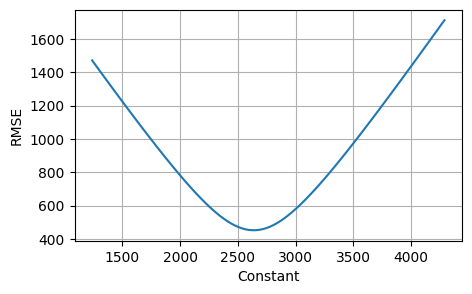

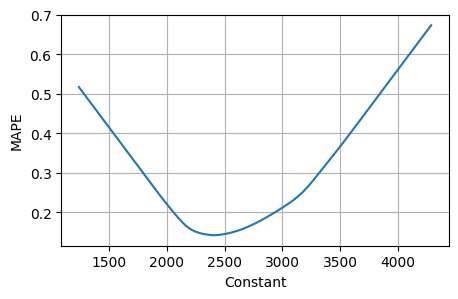

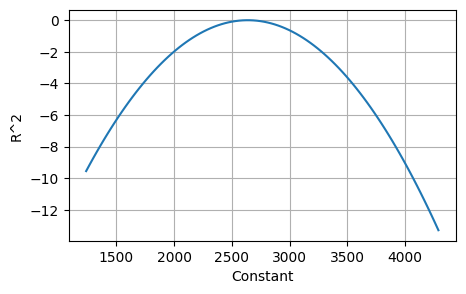

In [40]:
constants = np.linspace(y_train.min(), y_train.max(), num=100)
rmse_values = []
mape_values = []
r2_values = []

for constant in constants:
    y_preds_constant = np.full_like(y_test, constant)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds_constant))
    mape = mean_absolute_percentage_error(y_test, y_preds_constant)
    r2 = r2_score(y_test, y_preds_constant)
    rmse_values.append(rmse)
    mape_values.append(mape)
    r2_values.append(r2)

plot_metrics(constants, rmse_values, 'RMSE')
plot_metrics(constants, mape_values, 'MAPE')
plot_metrics(constants, r2_values, 'R^2')

## Обучение модели линейной регрессии

In [41]:
from sklearn.linear_model import LinearRegression

Для обучения модели линейной регрессии необходимо что-то сделать с признаком - `TRADEDATE`.

Решаем проблемы с помощью _лейбл-кодирования_:

In [42]:
label_encoder = LabelEncoder()

data_new['TRADEDATE'] = label_encoder.fit_transform(data_new['TRADEDATE'])

train_size = int(len(data_new) * 0.8)
train_data = data_new[:train_size]
test_data = data_new[train_size:]

X_train =  train_data.drop('CLOSE', axis=1)
X_test = test_data.drop('CLOSE', axis=1)
y_train = train_data['CLOSE']
y_test = test_data['CLOSE']

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [44]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_preds_lr))
print("RMSE константного предсказания:", rmse_lr)

mape_lr = mean_absolute_percentage_error(y_test, y_preds_lr)
print("MAPE константного предсказания:", mape_lr)

r2_lr = r2_score(y_test, y_preds_lr)
print("R^2 константного предсказания:", r2_lr)

RMSE константного предсказания: 109.07585071922784
MAPE константного предсказания: 0.026994186310605673
R^2 константного предсказания: 0.9419549826449848


Из любопытного:  
Если **хотя бы** _один_ признак удалить из набора тренировочной выборки, то скор резко становится _отрицательным_.  

**<u>Вопрос:</u>** говорит ли это о переобучении? 🤔  

<br>

Напомню корреляцию признаков:

In [45]:
data_new.columns

Index(['TRADEDATE', 'CLOSE', 'VALUE', 'CAPITALIZATION', 'DIVISOR',
       'OPEN_CLOSE_DIFF', 'PRICE_RANGE'],
      dtype='object')

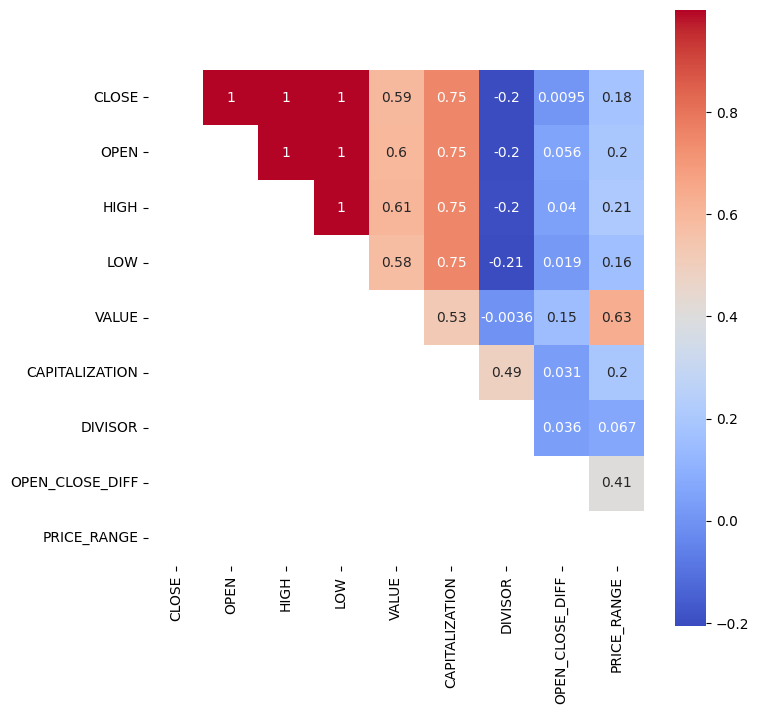

In [46]:
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap='coolwarm', square=True, annot=True);

### Визуализация результатов

Посмотрим, график качества модели линейной регрессии (зависимость предсказанных ею значений от истинных (реальных)):

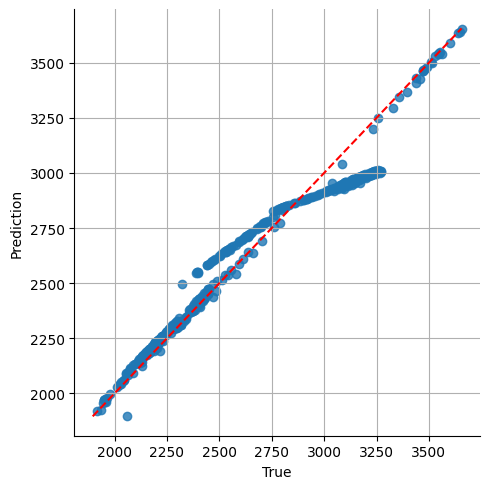

In [47]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')

In [48]:
decoded_feature = label_encoder.inverse_transform(data_new['TRADEDATE'])

trace_train = go.Scatter(
    x=decoded_feature[:len(train_data)],
    y=train_data['CLOSE'],
    mode='lines',
    name='Тренировочные данные'
)

trace_real = go.Scatter(
    x=decoded_feature[len(train_data):],
    y=test_data['CLOSE'],
    mode='lines',
    name='Реальные значения'
)

trace_pred = go.Scatter(
    x=decoded_feature[len(train_data):],
    y=y_preds_lr,
    mode='lines',
    name='Предсказанные значения'
)

data_trace = [trace_train, trace_real, trace_pred]

layout = go.Layout(
    title='Сравнение тренировочных, реальных и предсказанных значений',
    xaxis=dict(title='Дата'),
    yaxis=dict(title='Стоимость акций на момент закрытия')
)

fig = go.Figure(data=data_trace, layout=layout)
fig.show()